<a href="https://colab.research.google.com/github/lizbethlulu/Research-/blob/main/RM(TF_IDF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')
# https://drive.google.com/file/d//view?usp=sharing

In [ ]:

import pandas as pd
import numpy as np

# punya aida tweet, sosmed
df = pd.read_csv("https://dri   ve.google.com/uc?export=download&id=12SkcMwB3SQwpUMnqGaw9ImvRIf0somGN")
df.columns = ["comments","sosial media", 'label']

df.head(940)

,comments,sosial media,label
0,"['calon', 'presiden', 'miskin', 'percaya', 'pa...",instagram,1
1,"['c1', 'palsu', 'jurdil']",instagram,2
2,"['sidang', 'mahkamah', 'agung', 'milu', 'kayak']",instagram,2
3,"['banget', 'bu']",instagram,0
4,"['krakyat', 'indonesiam', 'berkas', 'via', 'em...",instagram,2
...,...,...,...
935,"['prabowo', 'ntidaku', 'ayah', 'mentidakui', '...",X,2
936,"['prabowo', 'titidakl', 'lantik', 'sssssaja', ...",X,2
937,"['fakta', 'prabowo', '4', 'putar']",X,2
938,"['rawan', 'prabowogibran', 'nyala', '1000', 'l...",X,2


In [ ]:
# convert list formated string to list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df["comments_list"] = df["comments"].apply(convert_text_list)


print(df["comments_list"])

print("\ntype : ", type(df["comments_list"]))

0      [calon, presiden, miskin, percaya, panutan, bu...
1                                    [c1, palsu, jurdil]
2                 [sidang, mahkamah, agung, milu, kayak]
3                                           [banget, bu]
4      [krakyat, indonesiam, berkas, via, email, dikr...
                             ...                        
938    [rawan, prabowogibran, nyala, 1000, lilin, ser...
939    [video, 1, saiful, mujani, blakan, kait, koali...
940    [prabowogibran, kalah, pelssssajaran, jokowi, ...
941    [menit, 32, anak, peluk, ayah, beliau, cinta, ...
942    [gugat, kpu, ptun, tapidi, calon, prabowogibra...
Name: comments_list, Length: 943, dtype: object

type :  <class 'pandas.core.series.Series'>


In [ ]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
df["comments_join"] = df["comments"].apply(join_text_list)

df["comments_join"].head()

0    calon presiden miskin percaya panutan butuh pa...
1                                      c1 palsu jurdil
2                     sidang mahkamah agung milu kayak
3                                            banget bu
4    krakyat indonesiam berkas via email dikrakyat ...
Name: comments_join, dtype: object

In [ ]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

df["TF_dict"] = df["comments_list"].apply(calc_TF)

df["TF_dict"].head()

0    {'calon': 0.09090909090909091, 'presiden': 0.0...
1    {'c1': 0.3333333333333333, 'palsu': 0.33333333...
2    {'sidang': 0.2, 'mahkamah': 0.2, 'agung': 0.2,...
3                           {'banget': 0.5, 'bu': 0.5}
4    {'krakyat': 0.09090909090909091, 'indonesiam':...
Name: TF_dict, dtype: object

In [ ]:
# Check TF result
index = 90

print('%20s' % "term", "\t", "TF\n")
for key in df["TF_dict"][index]:
    print('%20s' % key, "\t", df["TF_dict"][index][key])

                term 	 TF

               anies 	 0.5
              bangsa 	 0.5


In [ ]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(df["TF_dict"])

In [ ]:
n_document = len(df)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [ ]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)

In [ ]:
# Check TF-IDF result
index = 90

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in df["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", df["TF_dict"][index][key] ,"\t" , df["TF-IDF_dict"][index][key])


                term 	         TF 	              TF-IDF

               anies 	 0.5 	 0.8932356248032454
              bangsa 	 0.5 	 2.14205846258596


In [ ]:
# sort descending by value for DF dictionary
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df["TF_IDF_Vec"] = df["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(df["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(df["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23905077976885006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  50


In [ ]:

# Convert Series to List
TF_IDF_Vec_List = np.array(df["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
0,anies,39.052808
1,indonesia,29.293959
3,ganjar,27.490409
5,pilih,23.947091
7,presiden,23.413913
9,mahfud,23.399195
8,imin,23.228785
2,rakyat,22.908013
10,cak,22.511925
20,amin,21.588298


In [ ]:
TF_IDF_Vec_List

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.metrics import silhouette_score as ss

<ipython-input-15-18ba3459cb43>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=[X[0] for X in result],


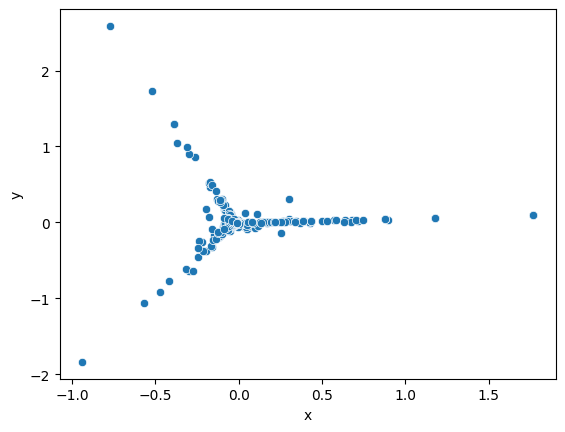

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(TF_IDF_Vec_List)
sns.scatterplot(x=[X[0] for X in result],
                y=[X[1] for X in result],
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
clustering = DBSCAN(eps=0.1, min_samples=5).fit(TF_IDF_Vec_List)

In [ ]:
df['cluster'] = clustering.labels_

In [ ]:
ss(TF_IDF_Vec_List, df['cluster'])

-0.07482229572350259

In [ ]:
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(TF_IDF_Vec_List)
x = tfidf_pca[:, 0]
y = tfidf_pca[:, 1]
fig = px.scatter(x=x, y=y, color=df['cluster'])
fig.show()
label_counts = df['cluster'].value_counts()
print("Sum of labels in scatter plot:", label_counts)


Sum of labels in scatter plot: cluster
-1    705
 0    189
 3     16
 2     10
 5      8
 1      5
 4      5
 6      5
Name: count, dtype: int64


In [ ]:
# optimal parameters
epsilon = np.linspace(0.1,1,num=7)
epsilon

array([0.1 , 0.25, 0.4 , 0.55, 0.7 , 0.85, 1.  ])

In [ ]:
min_samples = np.arange(2,10,step=3)
min_samples

array([2, 5, 8])

In [ ]:
import itertools
combinations = list(itertools.product(epsilon,min_samples))
combinations

[(0.1, 2),
 (0.1, 5),
 (0.1, 8),
 (0.25, 2),
 (0.25, 5),
 (0.25, 8),
 (0.4, 2),
 (0.4, 5),
 (0.4, 8),
 (0.5499999999999999, 2),
 (0.5499999999999999, 5),
 (0.5499999999999999, 8),
 (0.7, 2),
 (0.7, 5),
 (0.7, 8),
 (0.85, 2),
 (0.85, 5),
 (0.85, 8),
 (1.0, 2),
 (1.0, 5),
 (1.0, 8)]

In [ ]:
n = len(combinations)
n

21

In [ ]:
all_parameters = []

def get_scores_and_labels(combinations, TF_IDF_Vec_List):
    scores = []
    all_labels_list = []
    n = len(combinations)  # Added to get the number of combinations for print statements
    for i, (eps, num_samples) in enumerate(combinations):
        clustering = DBSCAN(eps=eps, min_samples=num_samples).fit(TF_IDF_Vec_List)
        labels = clustering.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1
        if (num_clusters < 2) or (num_clusters > 50):
            scores.append(-10)
            all_labels_list.append("bad")
            c = (eps, num_samples)
            print(f"combination {c} on iteration {i+1} of {n} has {num_clusters} clusters. next!")
            continue
        ss_val = ss(TF_IDF_Vec_List, labels)
        outliers = np.sum(labels == -1)
        scores.append(ss_val)
        all_labels_list.append(labels)
        parameters = {
            'epsilon': eps,
            'min_samples': num_samples,
            'score': ss_val,
            'num_clusters': num_clusters,
            'outliers': outliers
        }
        all_parameters.append(parameters)
        print(f"index {i}, score: {scores[-1]}, labels: {all_labels_list[-1]}, numClusters: {num_clusters}")
        parameters
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_scores = scores[best_index]
    return {
        'best_epsilon': best_parameters[0],
        'best_min_samples': best_parameters[1],
        'best_labels': best_labels,
        'best_score': best_scores
    }

best_dic = get_scores_and_labels(combinations,TF_IDF_Vec_List)

combination (0.1, 2) on iteration 1 of 21 has 54 clusters. next!
index 1, score: -0.07482229572350259, labels: [-1  0 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0  0 -1 -1 -1  0
 -1 -1  1 -1 -1 -1 -1  0 -1 -1  0 -1  0  0  0  0  0 -1 -1 -1  0  0 -1  0
 -1  0 -1 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0  0  1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1  4 -1 -1 -1 -1  0  0 -1  0 -1 -1  2 -1 -1 -1 -1  0 -1 -1 -1
 -1  0 -1  0 -1 -1  0 -1 -1  0  0 -1 -1  0 -1 -1 -1 -1 -1  2  0  0  0  0
 -1 -1 -1  2 -1  0  0  0 -1  0  0 -1  2 -1  0 -1 -1  0  0 -1 -1  0 -1  3
  0 -1 -1  0 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1 -1  0 -1 -1  0  0 -1  0 -1
  0 -1 -1  0  0 -1 -1  0  0 -1  0  0  0  0 -1  0 -1 -1 -1 -1 -1 -1  0  0
  0  0 -1 -1 -1 -1 -1 -1  0 -1  0  0  0  0 -1 -1 -1  0 -1 -1 -1  0  4 -1
  0  0  0  2  0  0  0  2  0  4  0  0 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1  0
 -1  0  0 -1  2 -1  0  0 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1  0  0 -1 -1 -1
  4 -1 -1  0 

In [ ]:
pr = pd.DataFrame(all_parameters)
pr

,epsilon,min_samples,score,num_clusters,outliers
0,0.10,5,-0.074822,7,705
1,0.10,8,-0.081552,3,728
2,0.25,2,-0.025913,40,405
3,0.25,5,0.037289,4,500
4,0.25,8,0.022938,2,533
5,0.40,2,0.155575,16,195
6,0.40,5,0.143177,3,249
7,0.55,2,0.340969,9,95
8,0.70,2,0.449792,7,47
9,0.85,2,0.594768,2,20


In [ ]:
best_dic

{'best_epsilon': 0.85,
 'best_min_samples': 2,
 'best_labels': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
         0,  0, -1,  0,  0

In [ ]:
df['cluster'] = best_dic['best_labels']
df['cluster'].value_counts()

cluster
 0    920
-1     20
 1      3
Name: count, dtype: int64

In [ ]:
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(TF_IDF_Vec_List)
x = tfidf_pca[:, 0]
y = tfidf_pca[:, 1]
fig = px.scatter(x=x, y=y, color=df['cluster'])
fig.show()
label_counts = df['cluster'].value_counts()
# label_counts
print("Sum of labels in scatter plot:", label_counts)


Sum of labels in scatter plot: cluster
 0    920
-1     20
 1      3
Name: count, dtype: int64


In [ ]:
labels = df['cluster']

clusters = {}
for label in set(labels):
    clusters[label] = df[df['cluster'] == label]['comments'].tolist()

for label, docs in clusters.items():
    clusters[label] = [eval(doc) if isinstance(doc, str) else doc for doc in docs]

print(clusters[1])

[['anies'], ['anies'], ['anies']]


In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

def apply_lda_to_clusters(clusters, num_topics):
    lda_models = {}
    for label, documents in clusters.items():
        print(f"Processing cluster {label} with {len(documents)} documents")
        if len(documents) == 0:
            print(f"Skipping cluster {label} because it is empty")
            continue
        # Pastikan setiap dokumen adalah list of strings
        if all(isinstance(doc, str) for doc in documents):
            tokenized_docs = [doc.split() for doc in documents]  # Tokenisasi jika dinyatakan sebagai string
        elif all(isinstance(doc, list) for doc in documents):
            tokenized_docs = documents  # Jika sudah dalam format list of strings
        else:
            print(f"Skipping cluster {label} because document format is not supported")
            continue

        dictionary = Dictionary(tokenized_docs)
        if len(dictionary) == 0:
            print(f"Skipping cluster {label} because dictionary is empty")
            continue
        corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
        if len(corpus) == 0:
            print(f"Skipping cluster {label} because corpus is empty")
            continue  # Skip clusters with empty corpus
        # Melatih model LDA
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
        lda_models[label] = {
            'lda_model': lda_model,
            'corpus': corpus,
            'dictionary': dictionary
        }
        print(f"Finished processing cluster {label}")
    return lda_models

num_topics = 1  # Jumlah topik yang diinginkan untuk setiap kluster
lda_models = apply_lda_to_clusters(clusters, num_topics=num_topics)


Processing cluster 0 with 920 documents
Finished processing cluster 0
Processing cluster 1 with 3 documents
Finished processing cluster 1
Processing cluster -1 with 20 documents
Finished processing cluster -1


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud


Topik untuk kluster 0:
Topik 1: anies (0.013716131), indonesia (0.011723837), rakyat (0.008965260), ganjar (0.007585967), dukung (0.007049583), presiden (0.006283311), pilih (0.006283297), prabowo (0.005900176), imin (0.005133897), mahfud (0.004674139), cak (0.004674137), gibran (0.004597516), cawapres (0.004520885), paslon (0.004520874), capres (0.004520873), ga (0.004291002), 02 (0.003907870), menang (0.003831226), jokowi (0.003754613), banget (0.003448105), rakayat (0.003064967), amin (0.003064959), suara (0.002988342), politik (0.002988338), anak (0.002835092), ahok (0.002681835), ubah (0.002681834), ssssaja (0.002528581), abah (0.002451950), darakyat (0.002451947), 1 (0.002298700), 01 (0.002222073), sehat (0.002222072), beliau (0.002222071), debat (0.002222070), prof (0.002145447), salah (0.002068819), hukum (0.002068819), negara (0.002068817), kampanye (0.002068816), tau (0.001992193), nyanyi (0.001992193), suka (0.001915564), gue (0.001915564), kalah (0.001915564), pimpin (0.001

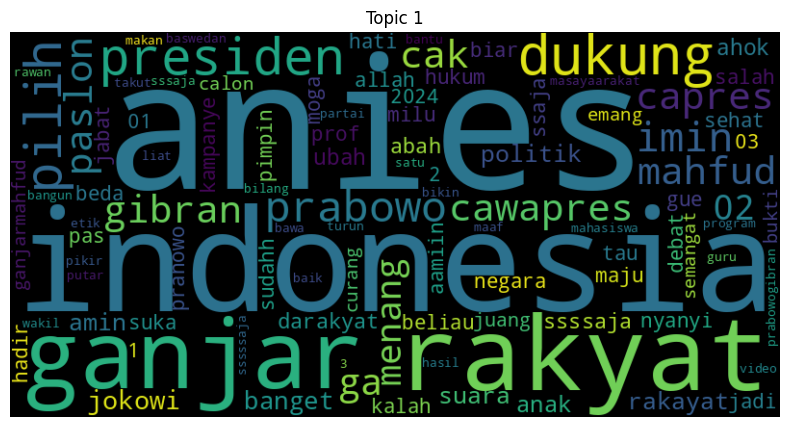

100


Topik untuk kluster 1:
Topik 1: anies (1.000000000)


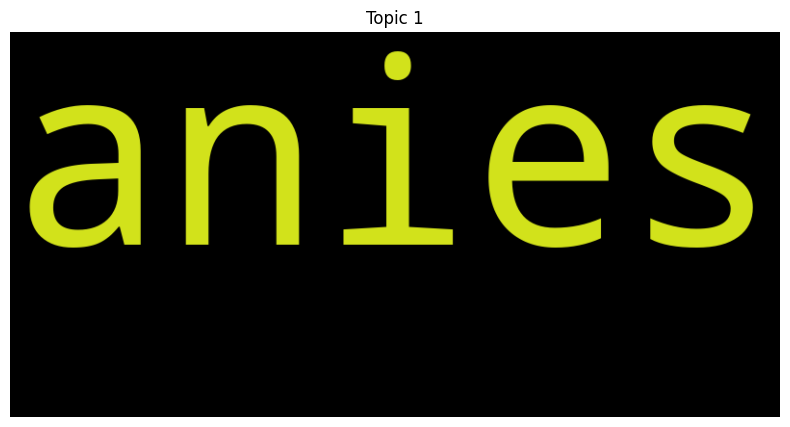

1


Topik untuk kluster -1:
Topik 1: sehat (0.054945126), 01 (0.043956079), cawapres (0.043956079), beliau (0.043956079), abah (0.043956079), presiden (0.032967042), pilih (0.032967042), amin (0.032967042), moga (0.032967042), 2024 (0.021978015), kangen (0.021978015), harap (0.021978015), cucu (0.021978015), jokowi (0.021978015), nyanyi (0.021978015), denger (0.021978015), pas (0.021978015), atur (0.021978015), debat (0.021978015), turut (0.021978015), cak (0.021978015), qi (0.021978015), prof (0.021978015), tau (0.021978015), buzzer (0.021978015), allah (0.021978015), rakyat (0.021978015), keren (0.021978015), ganjar (0.021978015), baik (0.021978015), ubah (0.021978015), suara (0.021978015), nyala (0.021978015), biar (0.021978015), mahfud (0.021978015), indonesia (0.021978013), imin (0.021978013), 03 (0.021978013)


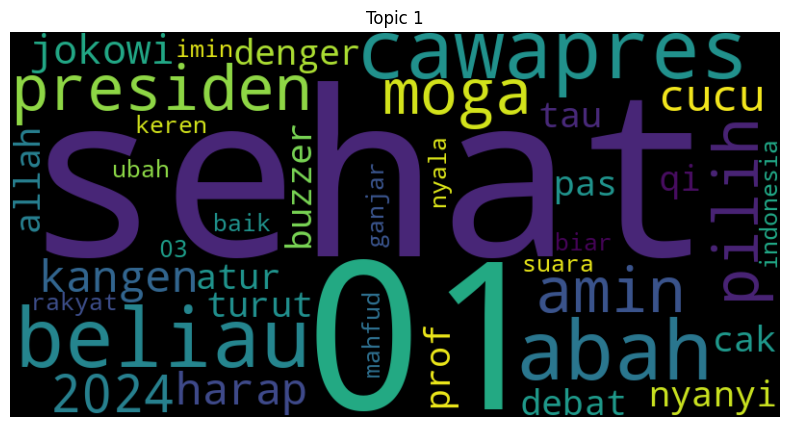

38




In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_topics_and_wordcloud(lda_model, num_topics, num_words=10):
    for topic_num in range(num_topics):
        topic_words = lda_model.show_topic(topic_num, topn=num_words)
        topic_words_str = ", ".join([f"{word} ({prob:.9f})" for word, prob in topic_words])
        print(f"Topik {topic_num + 1}: {topic_words_str}")
        word_freq = {word: prob for word, prob in topic_words}
        wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_num + 1}')
        plt.show()
        print(len(word_freq))
# Contoh penggunaan:
for label, model_info in lda_models.items():
    print(f"Topik untuk kluster {label}:")
    display_topics_and_wordcloud(model_info['lda_model'], num_topics=num_topics, num_words=100)
    print("\n")



In [ ]:
cluster_distribution = df.groupby(['sosial media', 'cluster']).size().unstack(fill_value=0)
print(cluster_distribution)

cluster       bad
sosial media     
X             458
instagram     485


In [ ]:
cluster_counts = cluster_distribution.stack().reset_index(name='count')
print(cluster_counts)

  sosial media cluster  count
0            X     bad    458
1    instagram     bad    485


In [ ]:
df

,comments,sosial media,label,comments_list,comments_join,TF_dict,TF-IDF_dict,TF_IDF_Vec,cluster
0,"['calon', 'presiden', 'miskin', 'percaya', 'pa...",instagram,1,"[calon, presiden, miskin, percaya, panutan, bu...",calon presiden miskin percaya panutan butuh pa...,"{'calon': 0.09090909090909091, 'presiden': 0.0...","{'calon': 0.35988132043066295, 'presiden': 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23905077...",bad
1,"['c1', 'palsu', 'jurdil']",instagram,2,"[c1, palsu, jurdil]",c1 palsu jurdil,"{'c1': 0.3333333333333333, 'palsu': 0.33333333...","{'c1': 2.051973034024504, 'palsu': 1.820923973...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",bad
2,"['sidang', 'mahkamah', 'agung', 'milu', 'kayak']",instagram,2,"[sidang, mahkamah, agung, milu, kayak]",sidang mahkamah agung milu kayak,"{'sidang': 0.2, 'mahkamah': 0.2, 'agung': 0.2,...","{'sidang': 1.0925543843027135, 'mahkamah': 0.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",bad
3,"['banget', 'bu']",instagram,0,"[banget, bu]",banget bu,"{'banget': 0.5, 'bu': 0.5}","{'banget': 1.5800934142597607, 'bu': 2.2732405...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",bad
4,"['krakyat', 'indonesiam', 'berkas', 'via', 'em...",instagram,2,"[krakyat, indonesiam, berkas, via, email, dikr...",krakyat indonesiam berkas via email dikrakyat ...,"{'krakyat': 0.09090909090909091, 'indonesiam':...","{'krakyat': 0.4597551648550366, 'indonesiam': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",bad
...,...,...,...,...,...,...,...,...,...
938,"['rawan', 'prabowogibran', 'nyala', '1000', 'l...",X,2,"[rawan, prabowogibran, nyala, 1000, lilin, ser...",rawan prabowogibran nyala 1000 lilin seru milu...,"{'rawan': 0.125, 'prabowogibran': 0.125, 'nyal...","{'rawan': 0.53551461564649, 'prabowogibran': 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",bad
939,"['video', '1', 'saiful', 'mujani', 'blakan', '...",X,3,"[video, 1, saiful, mujani, blakan, kait, koali...",video 1 saiful mujani blakan kait koalisi prab...,"{'video': 0.06451612903225806, '1': 0.03225806...","{'video': 0.2871723232151669, '1': 0.114620303...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0838893884059...",bad
940,"['prabowogibran', 'kalah', 'pelssssajaran', 'j...",X,3,"[prabowogibran, kalah, pelssssajaran, jokowi, ...",prabowogibran kalah pelssssajaran jokowi tinda...,"{'prabowogibran': 0.1, 'kalah': 0.1, 'pelssssa...","{'prabowogibran': 0.3958694524737293, 'kalah':...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.52591171...",bad
941,"['menit', '32', 'anak', 'peluk', 'ayah', 'beli...",X,0,"[menit, 32, anak, peluk, ayah, beliau, cinta, ...",menit 32 anak peluk ayah beliau cinta cinta al...,"{'menit': 0.1, '32': 0.1, 'anak': 0.1, 'peluk'...","{'menit': 0.5239628370199357, '32': 0.61559191...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",bad


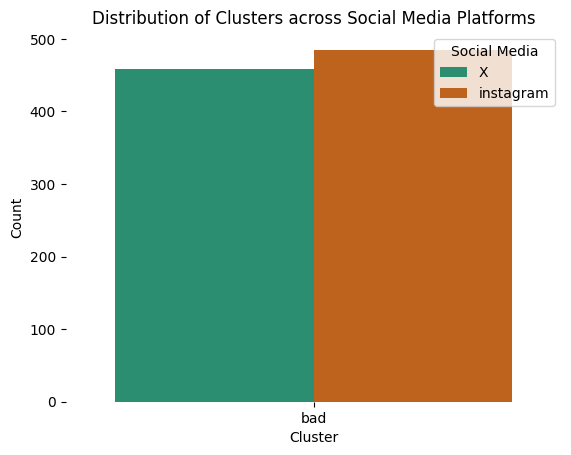

In [ ]:
# figsize = (12, 1.2 * len(df['sosial media'].unique()))
# plt.figure(figsize=figsize)
# sns.violinplot(df, x='cluster', y='sosial media', inner='box', palette='Dark2')
# sns.despine(top=True, right=True, bottom=True, left=True)

sns.barplot(data=cluster_counts, x='cluster', y='count', hue='sosial media', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Distribution of Clusters across Social Media Platforms')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Social Media', loc='upper right')
plt.show()